## Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

- Realizar el ajuste o ajustes de los modelos

- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos 
positivos, verdaderos negativos, falsos positivos y falsos negativos.

Happy coding 📊📈📉

In [186]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [187]:
df = pd.read_csv("../regresion_logistica/ficheros/loan_balanceado.csv", index_col = 0)
df.head()

,credit_history,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1,1
1,1,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0,0
2,1,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1,1
3,1,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1,1
4,1,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1,1


### Modelo realizado a partir de datos estandarizados y codificados.
Separamos x e y

In [188]:
X1 = df.drop("loan_status", axis = 1)
y1 = df["loan_status"]

In [189]:
X1.head()

,credit_history,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1
1,1,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0
2,1,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1
3,1,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1
4,1,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1


In [190]:
y1.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

Train y test

In [191]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Ajuste y predicción del modelo

In [192]:
log_reg_loan = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_loan.fit(x_train1,y_train1)

y_pred_train_loan = log_reg_loan.predict(x_train1)

y_pred_test_loan = log_reg_loan.predict(x_test1)

In [193]:
train_df_loan = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_loan, 'Set': ['Train']*len(y_train1)})
test_df_loan  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_loan,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_loan,test_df_loan], axis = 0)
resultados.head()

,Real,Predicted,Set
278,1,1,Train
110,1,1,Train
82,1,1,Train
51,1,0,Train
218,1,1,Train


Matriz de confusión

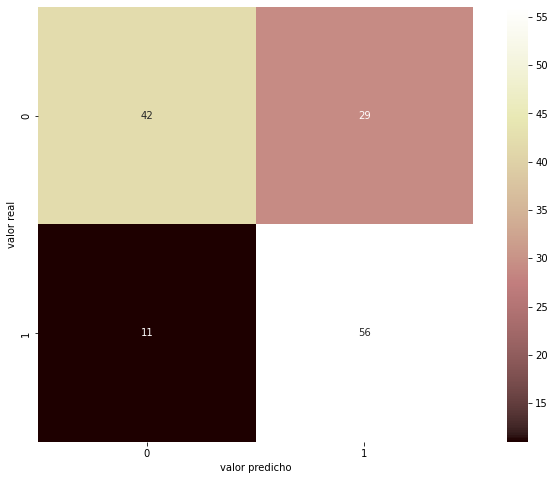

In [194]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_loan)


plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "pink")


plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()


Como resultado, vemos en la matriz de confusión que el FP corresponde a 29 casos y el FN serían 11 casos.
Por otro lado como aciertos, vemos el VP que corresponde a 56 casos y el VN 42.Entendemos que nuestro modelo es buen predictor porque acierta en mayor medidia de la que se equivoca.

-------